In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from skimage.io import imread
from skimage.measure import label, regionprops
from skimage.color import rgb2gray
from skimage.transform import resize

In [2]:
def bounding_box(image):
    # Binarization
    bin_image = rgb2gray(image) > 0.4
    label_im = label(bin_image, background=1)

    # Region Props
    regions = regionprops(label_im)
    fig, ax = plt.subplots(figsize=(5, 5))
    count = 0
    for props in regions:
        minr, minc, maxr, maxc = props.bbox
        area = (maxr - minr) * (maxc - minc)
        # Filtering Box by Area
        if area > 500 and area < 4000:
            bx = (minc, maxc, maxc, minc, minc)
            by = (minr, minr, maxr, maxr, minr)
            ax.plot(bx, by, '-r', linewidth=2)
            count += 1
    # Counting the number of boxes
    ax.set_title("Number of Boxes : {}".format(count))
    ax.imshow(image, alpha=0.5)

In [3]:
# Load the image
sudoku_image = imread(r"image1083.jpg")[350:1170, 75:-65]
sudoku_image = resize(sudoku_image, (900, 900), anti_aliasing=True)

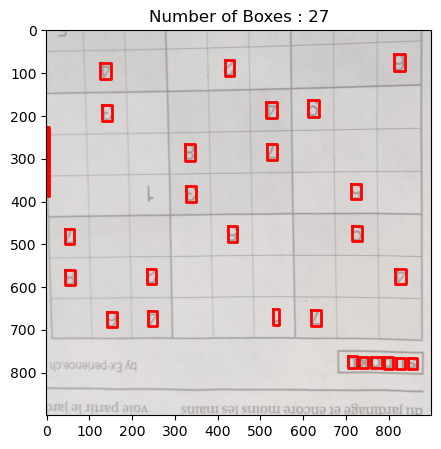

In [4]:
# Call the bounding_box function
bounding_box(sudoku_image)

plt.show()